#HW2 - Modeling and Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from scipy import stats

# Import sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

# !pip uninstall scikit-learn
# !pip install -U scikit-learn

# sklearn.__version__

# Part 1 - Data Loading

## Loading the dataset

In [ ]:
##### Loading CSV from Github: #####
#set your working_dir
working_dir = os.path.join(os.getcwd(), 'covid-19')

final_prediction_filename = 'https://raw.githubusercontent.com/chenp640/ML_Major_HW1/main/final_prediction_X_test.csv'
# Please note that 'final_prediction_X_test.csv' was originally the 'virus_test.csv' after performing the same preparations as the rest of the data (from HW1).

##### Loading CSV from local (upload the file): #####
!rm *.csv

from google.colab import files

print("Please load the cleaned train set that you save at the end of the previous exercise")
uploadedData = files.upload()
cleaned_train_filename = list(uploadedData)[0]

print("Please load the cleaned validation set that you save at the end of the previous exercise")
uploadedData = files.upload()
cleaned_validation_filename = list(uploadedData)[0]

print("Please load the cleaned test set that you save at the end of the previous exercise")
uploadedData = files.upload()
cleaned_test_filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the cleaned train set that you save at the end of the previous exercise


Saving selected_training_set (1).csv to selected_training_set (1).csv
Please load the cleaned validation set that you save at the end of the previous exercise


Saving selected_validation_set (1).csv to selected_validation_set (1).csv
Please load the cleaned test set that you save at the end of the previous exercise


Saving selected_test_set (1).csv to selected_test_set (1).csv


In [ ]:
final_prediction_X_test = pd.read_csv(final_prediction_filename)

cleaned_train_dataset = pd.read_csv(cleaned_train_filename)
cleaned_validation_dataset = pd.read_csv(cleaned_validation_filename)
cleaned_test_dataset = pd.read_csv(cleaned_test_filename)

# Part 2 - Evaluation method
Theorethical background

# Part 3 - Classification

In [ ]:
# Preparing the X and Y sets of train and validation for all Classifications
last_loc = cleaned_train_dataset.columns.get_loc('Virus')
X_train = cleaned_train_dataset.iloc[: , 1 : last_loc]
Y_train = cleaned_train_dataset.iloc[: , last_loc :] # For virus, risk, spreadLevel

X_validation = cleaned_validation_dataset.iloc[: , 1 : last_loc]
Y_validation = cleaned_validation_dataset.iloc[: , last_loc :]

In [ ]:
def norm(dataset):
  for col in dataset.columns:
    dataset[col] = stats.zscore(dataset[col])

norm(X_train)
norm(X_validation)

In [ ]:
def classifierAccuracy(X_train, Y_train, X_validation, Y_validation, classifier, k_range, svm_c_values=None, curr_label={0 : "Virus", 1 : "SpreadLevel", 2 : "Risk"}):
  # 3 labels - Risk, SpreadLevel and Virus 
  accuracy_train = ([], [], [])
  accuracy_valid = ([], [], [])
  for i in range(len(curr_label)):
    for k in k_range:
      if classifier is "KNeighborsClassifier":
        clf = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train[curr_label[i]])
      elif classifier is "DecisionTreeClassifier":
        clf = DecisionTreeClassifier(criterion = "entropy", max_depth = k).fit(X_train, Y_train[curr_label[i]])
      else:
        clf = LinearSVC(C=svm_c_values[k-1], max_iter=1000, dual=False).fit(X_train, Y_train[curr_label[i]])
      Y_train_pred = clf.predict(X_train)
      Y_validation_pred = clf.predict(X_validation)
      accuracy_train[i].append(accuracy_score(Y_train[curr_label[i]], Y_train_pred))
      accuracy_valid[i].append(accuracy_score(Y_validation[curr_label[i]], Y_validation_pred))
  return accuracy_train, accuracy_valid

In [ ]:
def plotAccuracies(accuracies_train, accuracies_validation, range_of_values, string_to_print, x_scale='linear', plots_to_plot=[0, 1, 2], f=None, axs=None):
  # Prepare data for plotting
  accuracies_train_Virus, accuracies_train_SpreadLevel, accuracies_train_Risk = accuracies_train
  accuracies_validation_Virus, accuracies_validation_SpreadLevel, accuracies_validation_Risk = accuracies_validation

  accuracies_train_df = pd.DataFrame({string_to_print : [t for t in range_of_values], 'Virus Accuracy' : accuracies_train_Virus, 'SpreadLevel Accuracy' : accuracies_train_SpreadLevel, 'Risk Accuracy' : accuracies_train_Risk})
  accuracies_validation_df = pd.DataFrame({string_to_print : [t for t in range_of_values], 'Virus Accuracy' : accuracies_validation_Virus, 'SpreadLevel Accuracy' : accuracies_validation_SpreadLevel, 'Risk Accuracy' : accuracies_validation_Risk})

  # plotting with seaborn
  sns.set_theme()
  if 0 in plots_to_plot:
    f, axs = plt.subplots(1, 3, figsize=(24, 6))
    g1 = sns.lineplot(data=accuracies_train_df, x=string_to_print, y="Virus Accuracy", ax=axs[0])
    g1 = sns.lineplot(data=accuracies_validation_df, x=string_to_print, y="Virus Accuracy", ax=axs[0])
    g1.set_title('Train and Validation accuracies for Virus as a function of ' + string_to_print, y=1.05)
    g1.legend(labels=["Train Virus Accuracy","Validation Virus Accuracy"])
    axs[0].set_xscale(x_scale)

  if 1 in plots_to_plot:
    g2 = sns.lineplot(data=accuracies_train_df, x=string_to_print, y="SpreadLevel Accuracy", ax=axs[1])
    g2 = sns.lineplot(data=accuracies_validation_df, x=string_to_print, y="SpreadLevel Accuracy", ax=axs[1])
    g2.set_title('Train and Validation accuracies for SpreadLevel as a function of ' + string_to_print, y=1.05)
    g2.legend(labels=["Train SpreadLevel Accuracy","Validation SpreadLevel Accuracy"])
    axs[1].set_xscale(x_scale)

  if 2 in plots_to_plot:
    g3 = sns.lineplot(data=accuracies_train_df, x=string_to_print, y="Risk Accuracy", ax=axs[2])
    g3 = sns.lineplot(data=accuracies_validation_df, x=string_to_print, y="Risk Accuracy", ax=axs[2])
    g3.set_title('Train and Validation accuracies for Risk as a function of ' + string_to_print, y=1.05)
    g3.legend(labels=["Train Risk Accuracy", "Validation Risk Accuracy"])
    axs[2].set_xscale(x_scale)
    
  f.tight_layout()
  return (f, axs)

## kNN Baseline

### (Q2)

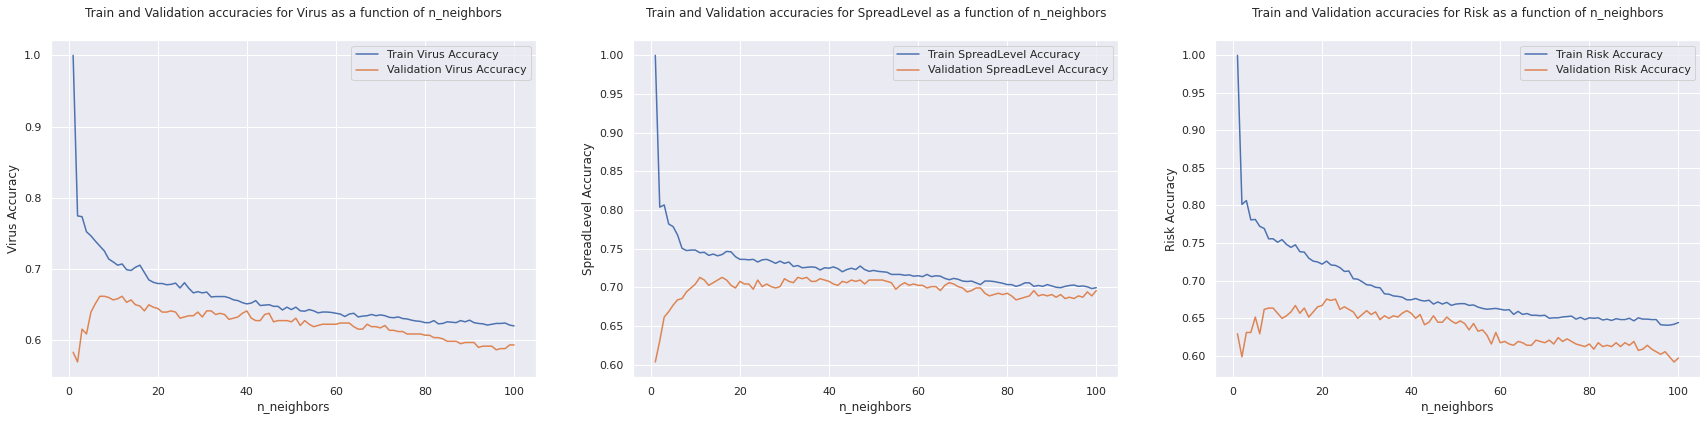

In [ ]:
knn_range_of_values = range(1, 101)
knn_accuracies_train, knn_accuracies_validation = classifierAccuracy(X_train, Y_train, X_validation, Y_validation, "KNeighborsClassifier", knn_range_of_values)

_ = plotAccuracies(knn_accuracies_train, knn_accuracies_validation, knn_range_of_values, "n_neighbors")

### (Q3) + (Q5)

In [ ]:
knn_train_best_accuracies = [max(l) for l in knn_accuracies_train]
knn_train_best_k = [knn_range_of_values[l.index(max(l))] for l in knn_accuracies_train]
knn_validation_best_accuracies = [max(l) for l in knn_accuracies_validation]
knn_validation_best_k = [knn_range_of_values[l.index(max(l))] for l in knn_accuracies_validation]
knn_best_accuracies = {'Train best accuracy' : knn_train_best_accuracies, 'Train corresponding k value' : knn_train_best_k, 'Validation best accuracy' : knn_validation_best_accuracies, 'Validation corresponding k value' : knn_validation_best_k}
knn_best_accuracies_table = pd.DataFrame(index=['Virus', 'SpreadLevel', 'Risk'], data=knn_best_accuracies)
knn_best_accuracies_table.head()

,Train best accuracy,Train corresponding k value,Validation best accuracy,Validation corresponding k value
Virus,1.0,1,0.661538,7
SpreadLevel,1.0,1,0.712821,11
Risk,1.0,1,0.675214,21


### (Q4) in the report pdf

## Decision Trees

### (Q6)

Training process using Decision Trees with maximal depth denoted by 't' in range [2, 100]



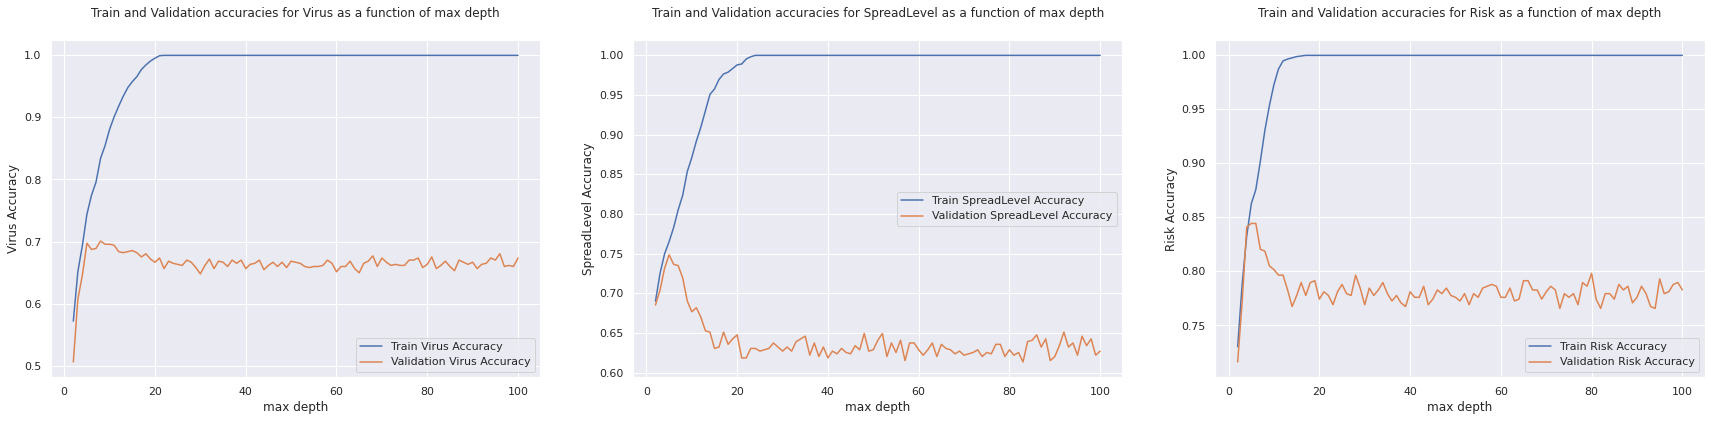

In [ ]:
decision_tree_range_of_values = range(2, 101)
decision_tree_accuracies_train, decision_tree_accuracies_validation = classifierAccuracy(X_train, Y_train, X_validation, Y_validation, "DecisionTreeClassifier", decision_tree_range_of_values)

print("Training process using Decision Trees with maximal depth denoted by \'t\' in range [2, 100]", end='\n\n')
_ = plotAccuracies(decision_tree_accuracies_train, decision_tree_accuracies_validation, decision_tree_range_of_values, "max depth")

### (Q7)

In [ ]:
decision_tree_train_best_accuracies = [max(l) for l in decision_tree_accuracies_train]
decision_tree_train_best_t = [decision_tree_range_of_values[l.index(max(l))] for l in decision_tree_accuracies_train]
decision_tree_validation_best_accuracies = [max(l) for l in decision_tree_accuracies_validation]
decision_tree_validation_best_t = [decision_tree_range_of_values[l.index(max(l))] for l in decision_tree_accuracies_validation]
decision_tree_best_accuracies = {'Train best accuracy' : decision_tree_train_best_accuracies, 'Train corresponding t value' : decision_tree_train_best_t, 'Validation best accuracy' : decision_tree_validation_best_accuracies, 'Validation corresponding t value' : decision_tree_validation_best_t}
decision_tree_best_accuracies_table = pd.DataFrame(index=['Virus', 'SpreadLevel', 'Risk'], data=decision_tree_best_accuracies)
decision_tree_best_accuracies_table.head()

,Train best accuracy,Train corresponding t value,Validation best accuracy,Validation corresponding t value
Virus,1.0,22,0.700855,8
SpreadLevel,1.0,24,0.748718,5
Risk,1.0,17,0.844444,5


### (Q8)

In [ ]:
from sklearn.metrics import confusion_matrix

decision_tree_best_t_validation_virus = decision_tree_best_accuracies_table['Validation corresponding t value']['Virus']

clf = DecisionTreeClassifier(criterion="entropy", max_depth=decision_tree_best_t_validation_virus).fit(X_train, Y_train['Virus'])
Y_validation_pred = clf.predict(X_validation)
print('The confusion matrix for Virus classification task on the validation set for the best hyperparameter we achieved (maximal_depth =', decision_tree_best_t_validation_virus, '):', end='\n\n')
print(confusion_matrix(Y_validation['Virus'], Y_validation_pred))

The confusion matrix for Virus classification task on the validation set for the best hyperparameter we achieved (maximal_depth = 8 ):

[[ 51   7  15   6   0   1]
 [  1 143   3   3  11   1]
 [  5  23 111   5   4   6]
 [  4  32   3  58   2   3]
 [  5  15   2   2  26   1]
 [  7   2   2   3   0  22]]


The confusion matrix for Virus classification task on the validation set for the best hyperparameter we achieved (maximal_depth = 8 ):



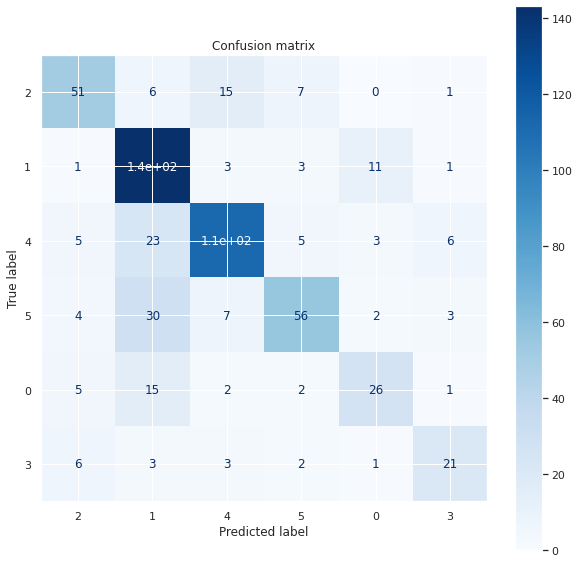

In [ ]:
from sklearn.metrics import plot_confusion_matrix

optimal_depth = decision_tree_best_t_validation_virus
clf = DecisionTreeClassifier(criterion='entropy',max_depth=optimal_depth).fit(X_train,Y_train['Virus'])
y_val_pred = clf.predict(X_validation)

# plot confusion matrix
confusion_matrix(Y_validation['Virus'], y_val_pred, labels=Y_validation['Virus'].unique())
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(clf, X_validation, Y_validation['Virus'], display_labels = Y_validation['Virus'].unique(), cmap=plt.cm.Blues,normalize=None, ax=ax)
print('The confusion matrix for Virus classification task on the validation set for the best hyperparameter we achieved (maximal_depth =', decision_tree_best_t_validation_virus, '):', end='\n\n')
disp.ax_.set_title("Confusion matrix")
plt.show()

### (Q9)
!!! Please note that it could take almost 1 minute for generating the large image !!!

In [ ]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(400, 70))
model = DecisionTreeClassifier(criterion="entropy", max_depth=7).fit(X_train, Y_train['Risk'])
feature_names_list = X_train.columns.to_list()
class_names_list = ['low', 'medium', 'high']
plot_tree(model, feature_names=feature_names_list, class_names=class_names_list, filled=True, fontsize=20)
fig.savefig('tree.png') # save as PNG so that we can zoom into it and understand it more

Here we calculated the features importance (ordered by decending order, i.e. from the most important to the least one)

In [ ]:
importances = model.tree_.compute_feature_importances(normalize=False)
features_importance = pd.DataFrame({'feature' : X_train.columns.to_list(), 'importance' : importances})

features_importance.sort_values(by='importance', ascending=False, inplace=True)
print(features_importance)

                                       feature  importance
11                                SportsPerDay    0.681989
1                              DisciplineScore    0.317393
6                                       PCR_72    0.049241
5                                        PCR_7    0.032131
8                                       PCR_95    0.028539
7                                       PCR_89    0.026798
3                   HouseholdExpenseOnPresents    0.018038
4                                       PCR_19    0.016114
10  Self_declaration_of_Illness_Form_for_Covid    0.007228
0                                          BMI    0.002308
2                               HappinessScore    0.000000
9             Self_declaration_of_Illness_Form    0.000000


### (Q10)

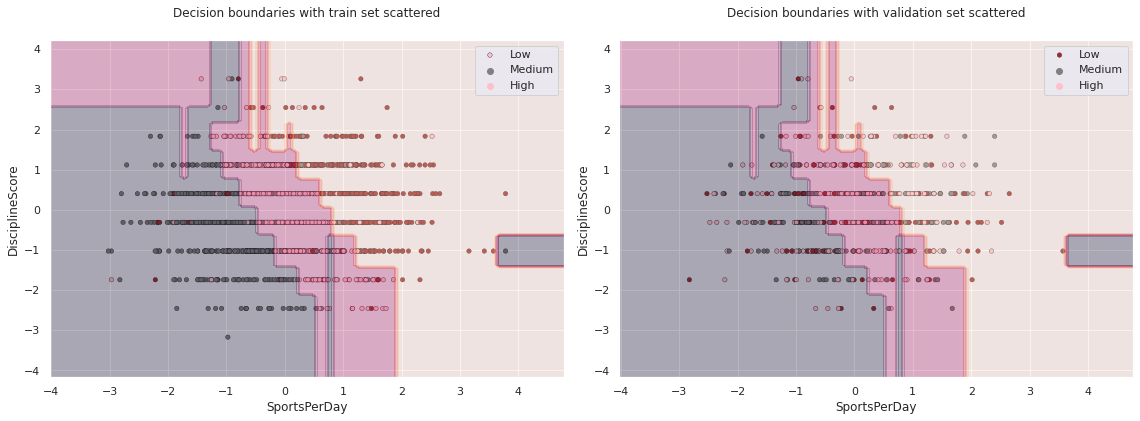

In [ ]:
best_two_features = features_importance['feature'][:2].to_list()
best_two_X_train = X_train[best_two_features]

model = DecisionTreeClassifier(criterion="entropy", max_depth=7).fit(best_two_X_train, Y_train['Risk'])

# Plotting decision regions
x_min, x_max = best_two_X_train.iloc[:, 0].min() - 1, best_two_X_train.iloc[:, 0].max() + 1
y_min, y_max = best_two_X_train.iloc[:, 1].min() - 1, best_two_X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

sns.set_theme()
f, axs = plt.subplots(1, 2, figsize=(16, 6))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

g1 = sns.scatterplot(x=best_two_X_train.iloc[:, 0], y=best_two_X_train.iloc[:, 1], hue=Y_train['Risk'], s=20, edgecolor='k', ax=axs[0], palette=['grey', 'pink', 'brown'])
g1.contourf(xx, yy, Z, alpha=0.3)
g1.set_title('Decision boundaries with train set scattered', y=1.05)
g1.legend(labels=['Low', 'Medium', 'High'])

g2 = sns.scatterplot(x=best_two_X_train.iloc[:, 0], y=best_two_X_train.iloc[:, 1], hue=Y_validation['Risk'], s=20, edgecolor='k', ax=axs[1], palette=['grey', 'pink', 'brown'])
g2.contourf(xx, yy, Z, alpha=0.3)
g2.set_title('Decision boundaries with validation set scattered', y=1.05)
g2.legend(labels=['Low', 'Medium', 'High'])

f.tight_layout()

### (Q11)

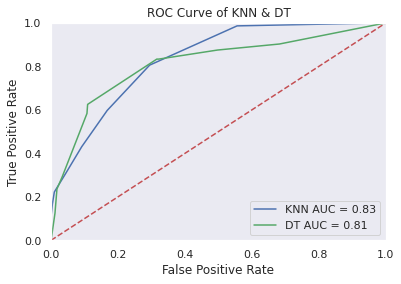

In [ ]:
import sklearn.metrics as metrics

Y_train_SpreadLevel_for_roc_curv = [1 if x == 2 else 0 for x in Y_train['SpreadLevel']]
Y_validation_SpreadLevel_for_roc_curv = [1 if x == 2 else 0 for x in Y_validation['SpreadLevel']]

knn = KNeighborsClassifier(n_neighbors=knn_validation_best_k[1]).fit(X_train, Y_train_SpreadLevel_for_roc_curv)
knn_Y_validation_pred = knn.predict_proba(X_validation)


decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=decision_tree_validation_best_t[1]).fit(X_train, Y_train_SpreadLevel_for_roc_curv)
decision_tree_Y_validation_pred = decision_tree.predict_proba(X_validation)

knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_true=Y_validation_SpreadLevel_for_roc_curv, y_score=knn_Y_validation_pred[:, 1])
decision_tree_fpr, decision_tree_tpr, decision_tree_thresholds = metrics.roc_curve(y_true=Y_validation_SpreadLevel_for_roc_curv, y_score=decision_tree_Y_validation_pred[:, 1])
knn_roc_auc = metrics.auc(knn_fpr, knn_tpr)
decision_tree_roc_auc = metrics.auc(decision_tree_fpr, decision_tree_tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(knn_fpr, knn_tpr, 'b', label = 'KNN AUC = %0.2f' % knn_roc_auc)
plt.plot(decision_tree_fpr, decision_tree_tpr, 'g', label = 'DT AUC = %0.2f' % decision_tree_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN & DT')
plt.grid()
plt.show()

### (Q12) - in the report pdf

## Support Vector Machine (SVC)

### (Q13)

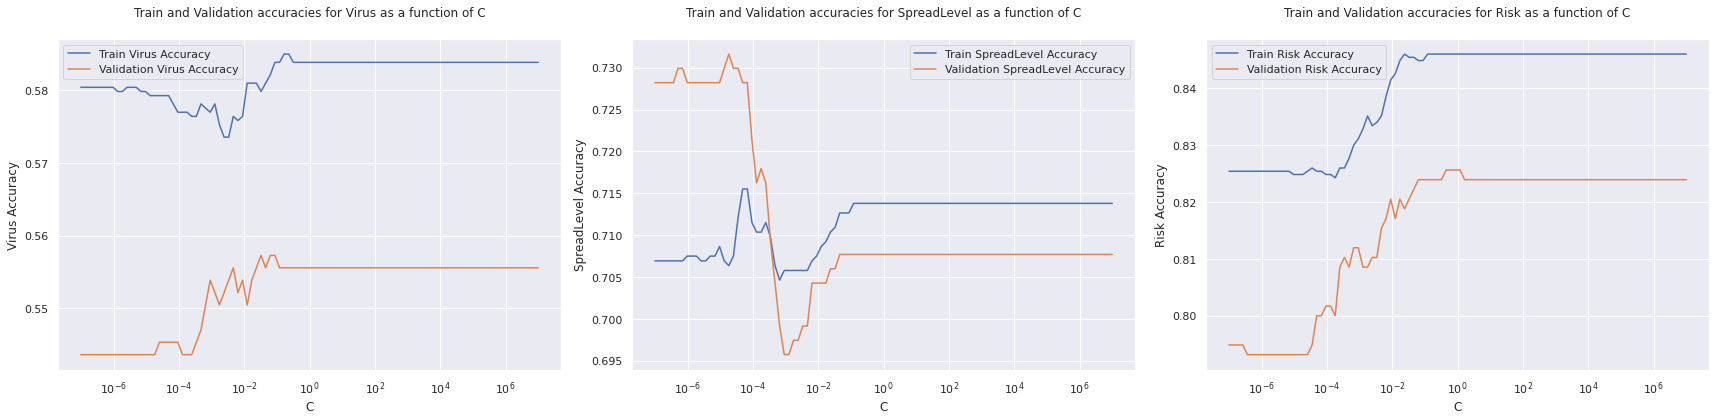

In [ ]:
svm_c_values = np.logspace(-7, 7, num = 100)
accuracies_train, accuracies_validation = classifierAccuracy(X_train, Y_train, X_validation, Y_validation, "svc", range(1, 101), svm_c_values=svm_c_values)

_ = plotAccuracies(accuracies_train, accuracies_validation, svm_c_values, "C", 'log')

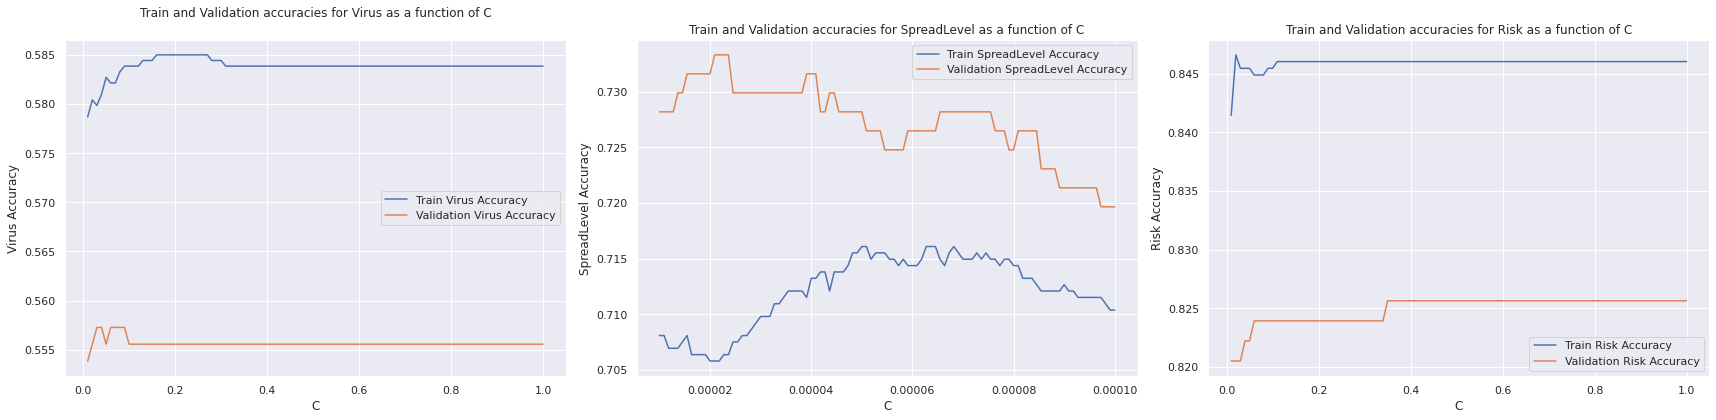

In [ ]:
svm_c_values_Virus = np.linspace(0.01, 1, num = 100)
svm_c_values_SpreadLevel = np.linspace(0.00001, 0.0001, num = 100)
svm_c_values_Risk = np.linspace(0.01, 1, num = 100)

accuracies_train_Virus, accuracies_validation_Virus = classifierAccuracy(X_train, Y_train, X_validation, Y_validation, "svc", range(1, 101), svm_c_values=svm_c_values_Virus, curr_label={0 : 'Virus'})
accuracies_train_SpreadLevel, accuracies_validation_SpreadLevel = classifierAccuracy(X_train, Y_train, X_validation, Y_validation, "svc", range(1, 101), svm_c_values=svm_c_values_SpreadLevel, curr_label={0 : 'SpreadLevel'})
accuracies_train_Risk, accuracies_validation_Risk = classifierAccuracy(X_train, Y_train, X_validation, Y_validation, "svc", range(1, 101), svm_c_values=svm_c_values_Risk, curr_label={0 : 'Risk'})

svm_accuracies_train = [accuracies_train_Virus[0], accuracies_train_SpreadLevel[0], accuracies_train_Risk[0]]
svm_accuracies_validation = [accuracies_validation_Virus[0], accuracies_validation_SpreadLevel[0], accuracies_validation_Risk[0]]

f, axs = plotAccuracies(svm_accuracies_train, svm_accuracies_validation, svm_c_values_Virus, "C", plots_to_plot=[0])
_ = plotAccuracies(svm_accuracies_train, svm_accuracies_validation, svm_c_values_SpreadLevel, "C", plots_to_plot=[1], f=f, axs=axs)
_ = plotAccuracies(svm_accuracies_train, svm_accuracies_validation, svm_c_values_Risk, "C", plots_to_plot=[2], f=f, axs=axs)

### (Q14)

In [ ]:
svm_c_values = [svm_c_values_Virus, svm_c_values_SpreadLevel, svm_c_values_Risk]
svm_train_best_accuracies = [max(l) for l in svm_accuracies_train]
svm_train_best_c = [svm_c_values[i][l.index(max(l))] for i, l in enumerate(svm_accuracies_train)]
svm_validation_best_accuracies = [max(l) for l in svm_accuracies_validation]
svm_validation_best_c = [svm_c_values[i][l.index(max(l))] for i, l in enumerate(svm_accuracies_validation)]
svm_best_accuracies = {'Train best accuracy' : svm_train_best_accuracies, 'Train corresponding c value' : svm_train_best_c, 'Validation best accuracy' : svm_validation_best_accuracies, 'Validation corresponding c value' : svm_validation_best_c}
svm_best_accuracies_table = pd.DataFrame(index=['Virus', 'SpreadLevel', 'Risk'], data=svm_best_accuracies)
svm_best_accuracies_table.head()

,Train best accuracy,Train corresponding c value,Validation best accuracy,Validation corresponding c value
Virus,0.585003,0.16000,0.557265,0.030000
SpreadLevel,0.716085,0.00005,0.733333,0.000021
Risk,0.846594,0.02000,0.825641,0.350000


### (Q15)

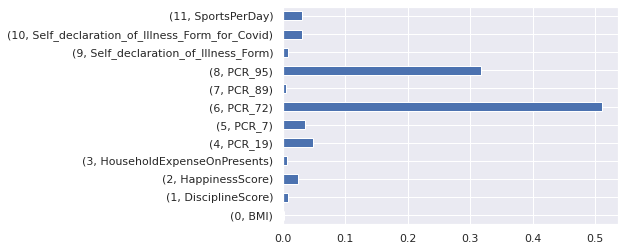

In [ ]:
svm_best_t_validation_virus = svm_best_accuracies_table['Validation corresponding c value']['Virus']
clf = LinearSVC(C=svm_best_t_validation_virus, dual=False).fit(X_train, Y_train['Virus'])
flu_index = np.where(clf.classes_ == 3)[0][0]
index = enumerate(X_train.columns)
pd.Series(abs(clf.coef_[flu_index]), index=index).plot(kind='barh')

### (Q16) in the report pdf

# Part 4 - Testing your models

In [ ]:
# Preparing the X and Y sets of test for all Classifications
X_test = cleaned_test_dataset.iloc[: , 1 : last_loc]
Y_test = cleaned_test_dataset.iloc[: , last_loc :] # For virus, risk, spreadLevel

norm(X_test)

In [ ]:
def testClassifierAccuracy(X_train, Y_train, X_test, Y_test, classifier, hyperparameters, curr_label={0 : "Virus", 1 : "SpreadLevel", 2 : "Risk"}):
  # 3 labels - Risk, SpreadLevel and Virus
  accuracy_test = []
  for i in range(len(curr_label)):
    if classifier is "KNeighborsClassifier":
      clf = KNeighborsClassifier(n_neighbors=hyperparameters[i]).fit(X_train, Y_train[curr_label[i]])
    elif classifier is "DecisionTreeClassifier":
      clf = DecisionTreeClassifier(criterion="entropy", max_depth=hyperparameters[i]).fit(X_train, Y_train[curr_label[i]])
    else:
      clf = LinearSVC(C=hyperparameters[i], max_iter=1000, dual=False).fit(X_train, Y_train[curr_label[i]])
    Y_test_pred = clf.predict(X_test)
    accuracy_test.append(accuracy_score(Y_test[curr_label[i]], Y_test_pred))
  return accuracy_test

### (Q17)

In [ ]:
print(knn_validation_best_k)
print(decision_tree_validation_best_t)
print(svm_validation_best_c)

knn_accuracies_test = testClassifierAccuracy(X_train, Y_train, X_test, Y_test, "KNeighborsClassifier", knn_validation_best_k)
decision_tree_accuracies_test = testClassifierAccuracy(X_train, Y_train, X_test, Y_test, "DecisionTreeClassifier", decision_tree_validation_best_t)
svm_accuracies_test = testClassifierAccuracy(X_train, Y_train, X_test, Y_test, "svc", svm_validation_best_c)

test_accuracies = {'Knn accuracy' : knn_accuracies_test, 'Decision Tree accuracy' : decision_tree_accuracies_test, 'SVM accuracy' : svm_accuracies_test}

test_accuracies_table = pd.DataFrame(index=['Virus', 'SpreadLevel', 'Risk'], data=test_accuracies)
test_accuracies_table.head()

[7, 11, 21]
[8, 5, 5]
[0.03, 2.090909090909091e-05, 0.35000000000000003]


,Knn accuracy,Decision Tree accuracy,SVM accuracy
Virus,0.643333,0.693333,0.563333
SpreadLevel,0.701667,0.748333,0.681667
Risk,0.595000,0.716667,0.746667


### (Q18) + (Q19) - in the report pdf

# Part 5 - Non-Linear SVM

### 1. + 2.

In [ ]:
import plotly.express as px
sns.reset_orig()
# Note that we mapped 'covid' to 4 and 'cmv' to 1

covid_cmv_filtered_dataset = X_train.copy()
covid_cmv_filtered_dataset['Virus'] = Y_train['Virus'].copy()
new_virus_column = []
rows_to_drop = []
for i, row in covid_cmv_filtered_dataset.iterrows():
  if row['Virus'] == 1:
    new_virus_column.append('CMV')
  elif row['Virus'] == 4:
    new_virus_column.append('Covid')
  else:
    rows_to_drop.append(i)

covid_cmv_filtered_dataset = covid_cmv_filtered_dataset.drop(rows_to_drop)
covid_cmv_filtered_dataset = covid_cmv_filtered_dataset.drop(columns='Virus')
covid_cmv_filtered_dataset['Virus'] = new_virus_column

colors_map = {'Covid' : 'red', 'CMV' : 'blue'}
px.scatter_3d(covid_cmv_filtered_dataset, x='PCR_7', y='PCR_72', z='PCR_89', color='Virus', color_discrete_map=colors_map)

### (Q20) + (Q21) in the report pdf

### (Q22)

In [ ]:
from sklearn.svm import SVC
train_accuracies, validation_accuracies = [], []
train_heatmap, validation_heatmap = pd.DataFrame({"C" : [], "sigma" : [], "accuracy" : []}), pd.DataFrame({"C" : [], "sigma" : [], "accuracy" : []})
for c in np.logspace(0, 4, num=50):
  for gamma in np.logspace(-4, -1, num=50):
    svc_model = SVC(C=c, kernel='rbf', gamma=gamma)
    svc_model.fit(X_train, Y_train['Virus'])
    train_predict = svc_model.predict(X_train)
    validation_predict = svc_model.predict(X_validation)
    train_acc = accuracy_score(Y_train['Virus'], train_predict)
    validation_acc = accuracy_score(Y_validation['Virus'], validation_predict)
    train_accuracies.append((train_acc, c, gamma))
    validation_accuracies.append((validation_acc, c, gamma))
    train_heatmap = train_heatmap.append({"C" : c, "sigma" : gamma, "accuracy" : train_acc}, ignore_index = True)
    validation_heatmap = validation_heatmap.append({"C" : c, "sigma" : gamma, "accuracy" : validation_acc}, ignore_index = True)

train_heatmap = train_heatmap.round({'sigma' : 6})
validation_heatmap = validation_heatmap.round({'sigma' : 6})
train_heatmap = train_heatmap.round({'C' : 6})
validation_heatmap = validation_heatmap.round({'C' : 6})

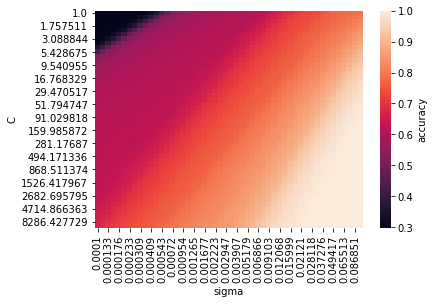

In [ ]:
# plot the heatmap graphics for Train
ax = sns.heatmap(train_heatmap.pivot_table(index='C', columns = 'sigma', values='accuracy'), cbar_kws={'label' : 'accuracy'})
train_best_nonlinear_SVM_Virus_accuracies = max(train_accuracies, key=lambda x : (x[0], -x[1]))
train_correlated_index_of_best = train_accuracies.index(train_best_nonlinear_SVM_Virus_accuracies)

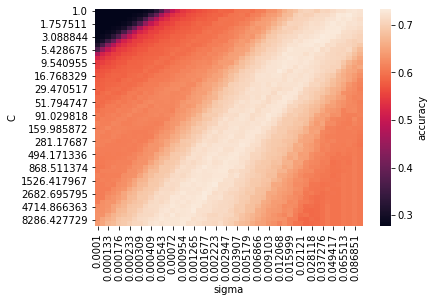

In [ ]:
# plot the heatmap graphics for Validation
ax = sns.heatmap(validation_heatmap.pivot_table(index='C', columns = 'sigma', values='accuracy'), cbar_kws={'label' : 'accuracy'})
validation_best_nonlinear_SVM_Virus_accuracies = max(validation_accuracies, key=lambda x : (x[0], -x[1]))
validation_correlated_index_of_best = validation_accuracies.index(validation_best_nonlinear_SVM_Virus_accuracies)

### (Q23)

In [ ]:
print("Table of best \'Virus\' accuracies with the appropriate c-hyperparameter and gamma-hyperparameter for train and validation:", end='\n\n')

best_C = [train_best_nonlinear_SVM_Virus_accuracies[1], validation_best_nonlinear_SVM_Virus_accuracies[1]]
best_sigma = [train_best_nonlinear_SVM_Virus_accuracies[2], validation_best_nonlinear_SVM_Virus_accuracies[2]]
best_nonlinear_SVM_Virus_accuracy = [train_best_nonlinear_SVM_Virus_accuracies[0], validation_best_nonlinear_SVM_Virus_accuracies[0]]

nonlinear_SVM_accuracies = {'best C-hyperparameter' : best_C, 'Best sigma-hyperparameter' : best_sigma, 'non-linear SVM accuracy on Virus' : best_nonlinear_SVM_Virus_accuracy}

nonlinear_SVM_accuracies_table = pd.DataFrame(index=['Train', 'Validation'], data=nonlinear_SVM_accuracies)
nonlinear_SVM_accuracies_table.head()

Table of best 'Virus' accuracies with the appropriate c-hyperparameter and gamma-hyperparameter for train and validation:



,best C-hyperparameter,Best sigma-hyperparameter,non-linear SVM accuracy on Virus
Train,339.322177,0.100000,1.000000
Validation,3.088844,0.037276,0.733333


# Part 7 - Submitted model predictions

In [ ]:
def finalPredication(X_train, Y_train, X_test, classifier, hyperparameters, curr_label={0 : "Virus", 1 : "SpreadLevel", 2 : "Risk"}):
  # 3 labels - Risk, SpreadLevel and Virus
  Y_test_predictions = []
  for i in range(len(curr_label)):
    if classifier is "KNeighborsClassifier":
      clf = KNeighborsClassifier(n_neighbors=hyperparameters[i]).fit(X_train, Y_train[curr_label[i]])
    elif classifier is "DecisionTreeClassifier":
      clf = DecisionTreeClassifier(criterion="entropy", max_depth=hyperparameters[i]).fit(X_train, Y_train[curr_label[i]])
    else:
      clf = LinearSVC(C=hyperparameters[i], max_iter=1000, dual=False).fit(X_train, Y_train[curr_label[i]])
    Y_test_pred = clf.predict(X_test)
    Y_test_predictions.append(Y_test_pred)
  return Y_test_predictions

In [ ]:
def VirusTypeConvert(x):    # Convert VirusType from 'Regular format' to numeric identifier (set arbitrarily by us) and vice versa
  virus_types = {'not_detected' : 0, 'cmv' : 1, 'cold' : 2, 'flue' : 3, 'covid' : 4, 'measles' : 5}
  if (x in ['not_detected', 'cmv', 'cold', 'flue', 'covid', 'measles']):
    return virus_types[x]
  else:
    for b, n in virus_types.items():
      if n == x:
        return b

def SpreadLevelAndRiskConvert(x):
  return ['low' if item == 0 else 'medium' if item == 1 else 'high' for item in x]

In [ ]:
final_X_train = pd.concat([X_train, X_validation, X_test])
final_Y_train = pd.concat([Y_train, Y_validation, Y_test])
final_prediction_X_test_ID = final_prediction_X_test['ID']
final_prediction_X_test = final_prediction_X_test.drop(columns='ID')
final_prediction_X_test = final_prediction_X_test.iloc[: , 1 :]
norm(final_prediction_X_test)

final_prediction_X_test.head()

# kNN
pred_knn = finalPredication(final_X_train, final_Y_train, final_prediction_X_test, 'KNeighborsClassifier', knn_validation_best_k)
pred_knn = pd.DataFrame({'Virus' : pred_knn[0], 'SpreadLevel' : pred_knn[1], 'Risk' : pred_knn[2]})
pred_knn = pd.concat([final_prediction_X_test_ID, pred_knn], axis=1, join="inner")

pred_knn.Virus = [VirusTypeConvert(x) for x in pred_knn.Virus.to_list()]
pred_knn.SpreadLevel = SpreadLevelAndRiskConvert(pred_knn.SpreadLevel)
pred_knn.Risk = SpreadLevelAndRiskConvert(pred_knn.Risk)

# Decision Tree
pred_dt = finalPredication(final_X_train, final_Y_train, final_prediction_X_test, 'DecisionTreeClassifier', decision_tree_validation_best_t)
pred_dt = pd.DataFrame({'Virus' : pred_dt[0], 'SpreadLevel' : pred_dt[1], 'Risk' : pred_dt[2]})
pred_dt = pd.concat([final_prediction_X_test_ID, pred_dt], axis=1, join="inner")

pred_dt.Virus = [VirusTypeConvert(x) for x in pred_dt.Virus.to_list()]
pred_dt.SpreadLevel = SpreadLevelAndRiskConvert(pred_dt.SpreadLevel)
pred_dt.Risk = SpreadLevelAndRiskConvert(pred_dt.Risk)

# linear-SVM
pred_svm = finalPredication(final_X_train, final_Y_train, final_prediction_X_test, 'svc', svm_validation_best_c)
pred_svm = pd.DataFrame({'Virus' : pred_svm[0], 'SpreadLevel' : pred_svm[1], 'Risk' : pred_svm[2]})
pred_svm = pd.concat([final_prediction_X_test_ID, pred_svm], axis=1, join="inner")

pred_svm.Virus = [VirusTypeConvert(x) for x in pred_svm.Virus.to_list()]
pred_svm.SpreadLevel = SpreadLevelAndRiskConvert(pred_svm.SpreadLevel)
pred_svm.Risk = SpreadLevelAndRiskConvert(pred_svm.Risk)

In [ ]:
# kNN csv file generate and download
pred_knn_csv_filename = "pred_knn.csv"
pred_knn.to_csv(pred_knn_csv_filename)
files.download(pred_knn_csv_filename)

# Decision Tree csv file generate and download
pred_dt_csv_filename = "pred_dt.csv"
pred_dt.to_csv(pred_dt_csv_filename)
files.download(pred_dt_csv_filename)

# linear-SVM csv file generate and download
pred_svm_csv_filename = "pred_svm.csv"
pred_svm.to_csv(pred_svm_csv_filename)
files.download(pred_svm_csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>